# ULMFiT Sentiment Analysis Challenge

### Semi-supervised ULMFiT model to Twitter US Airlines Sentiment 
<br>

Monica<br>
monica110394@gmail.com<br>
https://www.linkedin.com/in/monica110394/ <br>
<br>
Date: 01/9/2019

Environment: Python 3.6 and Jupyter notebook<br>
<br>
Datasets : Twitter US Airlines Sentiment
*   tweets.csv - labeled data
*   https://www.kaggle.com/crowdflower/twitter-airline-sentiment#Tweets.csv



In [1]:
#connecting to google drive
from google.colab import drive
import sys
import os

#Mount your Google drive to the VM
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/')
os.chdir("/content/gdrive/My Drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Multi-label text classification using ULMFiT and FastAI Library in Python
# ULMFiT - Universal Language Model Fine Tuning

This method is one of the latest developments in the field of text classification in the hope that we can classify text much better. This concept focuses on understanding language rather than just text or words. ULMFiT makes use of transfer learning to create a Language Model. 
<br>
<br>
ULMFiT proposed by Jeremy Howard and NUI Galway Insight Center’s Sebastian Ruder, is capable of predicticting next word in the sentence  based on unsupervised learning of the WikiText 103 corpus. It uses multiple LSTM layers, with dropout applied to every layer which the secret behind this method. This was developed by Steve Merity (Salesforce) as the AWD-LSTM architecture. 
<br><br>
Main Reference -> https://medium.com/technonerds/using-fastais-ulmfit-to-make-a-state-of-the-art-multi-label-text-classifier-bf54e2943e83
<br>
Document for FastAI -> 
https://docs.fast.ai/text.data.html#TextLMDataBunch

In [6]:
# importing important libraries
from fastai.text import *
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import re
import plotly.express as px
from textblob import TextBlob

# Optional: use this line if you want to remove Pandas'
# default concatenation of long text in columns
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



__from sklearn.feature_selection import chi2:__
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Chi square test tells you that which features are better related with the outcome variable. Smaller p value means more closely related with the outcome.

Reference -> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

# Overview the Dataset:

In [7]:
# loading the dataset
data = pd.read_csv('fellowship/tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
# knowing the dimensions of the dataset
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])
print('\n')

# printing the dataset information
data.info()

Number of rows: 14640
Number of columns: 15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created 

In [9]:
# discarding the unnecessary columns and keeping the important ones
data = data[['tweet_id','text','airline','airline_sentiment_confidence','airline_sentiment']]
data

,tweet_id,text,airline,airline_sentiment_confidence,airline_sentiment
0,570306133677760513,@VirginAmerica What @dhepburn said.,Virgin America,1.0000,neutral
1,570301130888122368,@VirginAmerica plus you've added commercials to the experience... tacky.,Virgin America,0.3486,positive
2,570301083672813571,@VirginAmerica I didn't today... Must mean I need to take another trip!,Virgin America,0.6837,neutral
3,570301031407624196,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",Virgin America,1.0000,negative
4,570300817074462722,@VirginAmerica and it's a really big bad thing about it,Virgin America,1.0000,negative
...,...,...,...,...,...
14635,569587686496825344,@AmericanAir thank you we got on a different flight to Chicago.,American,0.3487,positive
14636,569587371693355008,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,American,1.0000,negative
14637,569587242672398336,@AmericanAir Please bring American Airlines to #BlackBerry10,American,1.0000,neutral
14638,569587188687634433,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",American,1.0000,negative


In [10]:
# Removing null values in the dataset 
data.dropna(inplace=True)

# Resetting the index
data = data.reset_index(drop=True)

In [11]:
# printing the rows and columns after thw above changes
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])
print('\n')

# printing the information
data.info()

# printing the statistical summary of the dataset
data.describe(include='all')

Number of rows: 14640
Number of columns: 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   text                          14640 non-null  object 
 2   airline                       14640 non-null  object 
 3   airline_sentiment_confidence  14640 non-null  float64
 4   airline_sentiment             14640 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 572.0+ KB


,tweet_id,text,airline,airline_sentiment_confidence,airline_sentiment
count,1.464000e+04,14640,14640,14640.000000,14640
unique,NaN,14427,6,NaN,3
top,NaN,@united thanks,United,NaN,negative
freq,NaN,6,3822,NaN,9178
mean,5.692184e+17,NaN,NaN,0.900169,NaN
std,7.791112e+14,NaN,NaN,0.162830,NaN
min,5.675883e+17,NaN,NaN,0.335000,NaN
25%,5.685592e+17,NaN,NaN,0.692300,NaN
50%,5.694779e+17,NaN,NaN,1.000000,NaN
75%,5.698905e+17,NaN,NaN,1.000000,NaN


From the description above we can clearly see that the most common sentiment is 'negative' which is for airline 'United'.

In [12]:
# printing a sample of the dataset
data.sample(1)

,tweet_id,text,airline,airline_sentiment_confidence,airline_sentiment
6517,567805714216792064,@SouthwestAir my pts expired. I made a prchase @ an online retailer to b told by SW that those won't show for 6-8 wks so too L8 2 keepmy pts,Southwest,0.6729,negative


# Exploratory Data Analysis:

In [13]:
# plotting the sentiment confidence v/s sentiment
fig = px.scatter(data, x="airline_sentiment", y="airline_sentiment_confidence", width=800, height=700)
fig.update_layout(
    title="Confidence of the Reviews",
    yaxis_title="Confidence",
    xaxis_title="Sentiment")
fig.show()

Looking at the above plot, it can be said that sentiment confidence for most of the reviews is too low therefore we can omit the reviews with low confidence.

In [14]:
# Keeping the reviews that has a sentiment with confidence >= 0.6
labeled = data[data['airline_sentiment_confidence'] >= 0.6]

In [15]:
# printing the rows and columns of the updated dataset
print('Number of rows:',labeled.shape[0])
print('Number of columns:',labeled.shape[1])
print('\n')

# printing the information
labeled.info()

# printing the description
labeled.describe(include='all')

Number of rows: 14402
Number of columns: 5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14402 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14402 non-null  int64  
 1   text                          14402 non-null  object 
 2   airline                       14402 non-null  object 
 3   airline_sentiment_confidence  14402 non-null  float64
 4   airline_sentiment             14402 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 675.1+ KB


,tweet_id,text,airline,airline_sentiment_confidence,airline_sentiment
count,1.440200e+04,14402,14402,14402.000000,14402
unique,NaN,14196,6,NaN,3
top,NaN,@united thanks,United,NaN,negative
freq,NaN,6,3759,NaN,9113
mean,5.692187e+17,NaN,NaN,0.909153,NaN
std,7.791451e+14,NaN,NaN,0.148251,NaN
min,5.675883e+17,NaN,NaN,0.603900,NaN
25%,5.685608e+17,NaN,NaN,0.698800,NaN
50%,5.694799e+17,NaN,NaN,1.000000,NaN
75%,5.698902e+17,NaN,NaN,1.000000,NaN


The description of the labeled dataset tells us that the most common sentiment tweeted was 'negative' and that was for the airline 'United'

In [16]:
# !pip install plotly
import plotly.express as px

# negative: 0
# neutral: 1
# positive: 2

# histogram of airline_sentiment
fig = px.histogram(labeled, x="airline_sentiment", nbins=10, width=800, height=700)
fig.update_layout(
    title="Distribution of Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Count")
fig.show()

Looking at the graph above we can say that the dataset is not balanced. For more than 9000 reviews, there is negative response, whereas there is a little difference between the number of neutral and positive reviews. Since the labels are not balanced, it can be said that the dataset has high variance.

In [17]:
# histogram of the airlines
fig = px.histogram(labeled, x="airline", nbins=10, width=800, height=700)
fig.update_layout(
    title="Distribution of Airlines",
    xaxis_title="Airline",
    yaxis_title="Count")
fig.show()

The above graph tells us that the airline 'United' got the highest number of tweets, follwed by airlines 'US Airways' and 'American'. t seems that these airlines are quite famous. On the other hand, 'Virgin America' received the lowest number of tweets which tells us that this airline is not quite spoken of.

In [20]:
fig = px.histogram(labeled, x='airline', nbins=10, facet_col_wrap=3, facet_col='airline_sentiment')
fig.update_layout(
    title="Distribution of Airlines Across Each Sentiment",
    yaxis_title="Count")
fig.show()

For the above plot, it can be said that most of the tweets are negative, the highest being for the airline 'United', 'US Airways' and 'American'. Overall, there are more negative tweets than positive or neutral.

In [21]:
fig = px.histogram(labeled, x="airline_sentiment", nbins=10, facet_col_wrap = 6, facet_col='airline')
fig.update_layout(
    title="Distribution of Sentiment of Each Airline",
    yaxis_title="Count")
fig.show()

In the above graph, it can be seen as before that 'United', 'US Airways' and 'American' airlines received negative tweets mostly, whereas 'Southwest' and 'Delta' airlines received positive tweets comparitively.

# Preparing the Labeled dataset for Supervised Learning:

In [27]:
labeled

,tweet_id,text,airline,airline_sentiment_confidence,airline_sentiment
0,570306133677760513,@VirginAmerica What @dhepburn said.,Virgin America,1.0000,neutral
2,570301083672813571,@VirginAmerica I didn't today... Must mean I need to take another trip!,Virgin America,0.6837,neutral
3,570301031407624196,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",Virgin America,1.0000,negative
4,570300817074462722,@VirginAmerica and it's a really big bad thing about it,Virgin America,1.0000,negative
5,570300767074181121,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,Virgin America,1.0000,negative
...,...,...,...,...,...
14634,569587691626622976,@AmericanAir right on cue with the delays👌,American,0.6684,negative
14636,569587371693355008,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,American,1.0000,negative
14637,569587242672398336,@AmericanAir Please bring American Airlines to #BlackBerry10,American,1.0000,neutral
14638,569587188687634433,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",American,1.0000,negative


In [28]:
# keeping only 2 columns for supervised learning
model_data=labeled[['airline_sentiment','text']]

# encoding the sentiment 
le = LabelEncoder() 
model_data['airline_sentiment']= le.fit_transform(model_data['airline_sentiment']) 

# removing 'urls' and 'words followed by @' from text reviews
model_data['text'] = model_data['text'].apply(lambda x: re.sub(r'https?://[A-Za-z0-9./]+[-|\.|&|\+|%|=|\?*\w*]*','',x))
model_data['text'] = model_data['text'].apply(lambda x: re.sub(r'(@\S* )','',x))

model_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,airline_sentiment,text
0,1,What said.
2,1,I didn't today... Must mean I need to take another trip!
3,0,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,0,and it's a really big bad thing about it
5,0,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
...,...,...
14634,0,right on cue with the delays👌
14636,0,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,1,Please bring American Airlines to #BlackBerry10
14638,0,"you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"


# Supervised Learning:

In [29]:
from sklearn.model_selection import train_test_split

# splitting the dataset into test and train 
df_trn, df_val = train_test_split(model_data, stratify = model_data['airline_sentiment'], test_size = 0.1, random_state = 5)
df_trn.shape, df_val.shape

((12961, 2), (1441, 2))

## Pre-processing the Data:

Next, we will setup our data in the format that FastAI requires it to be in. FastAI provides simple functions to create Language Model and Classification "data bunch".<br><br>
Creating a data bunch automatically results in pre-processing of text, including vocabulary formation and tokenization. 
<br><br>
__TextLMDataBunch:__ creates a data bunch for language modelling. In this, labels are completely ignored. Instead, data is processed so that the RNN can learn what word comes next given a starting word. All the texts in the datasets are concatenated and the labels are ignored. Instead, the target is the next word in the sentence.

__TextClasDataBunch:__ sets up the data for classification. Labels play a key role here. We can also set the batch size for learning by changing the bs parameter. 

In [30]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

__bs=32:__ is batch_size parameter. Usually, text databases are huge, so we need to feed these text into a GPU using batches, batch size 32 means that we will feed 32 texts at once to update parameters of our deep learning model. On running out of memory because of smaller GPU RAM, you can reduce batch size to 16. Here we have used Google Colab to execute our model hence bs=32. Also, training with large mini batches such as 128 or 256 might be bad.<br><br>
Reference -> https://towardsdatascience.com/transfer-learning-using-the-fastai-library-d686b238213e<br>
<br>
It is recommended to use smaller batch sizes if the GPU is not that large. Also, using larger batch sizes leads to lower train loss, but the test loss is comparatively larger. The test loss decreases if we decrease the batch size which is exactly what we want.<br> 
Research Paper -> https://arxiv.org/pdf/1803.09820.pdf

In [31]:
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning:

This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)



text,target
xxbos xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,1
xxbos xxup plans xxup changed ! xxup is xxup that xxup what u xxup call xxup not xxup bein xxup able 2 xxup park xxup on xxup time xxup planes w a 2 xxup hr xxup layover n b xxup able 2 xxup make xxup ur xxup connection ! # seriously,0
xxbos xxmaj the xxmaj fact xxmaj that u xxmaj see xxmaj black xxmaj history xxmaj month 12 xxmaj months a xxmaj year xxmaj is xxmaj xxunk ! xxmaj we xxup will xxup be xxmaj an xxmaj xxunk xxmaj base xxmaj for xxmaj corp. xxmaj like u xxmaj in xxmaj future !,2
"xxbos e xxrep 4 y ! xxmaj cancelled xxmaj flightlations , xxmaj flight xxmaj booking xxmaj problemss , reflight xxmaj booking xxmaj problemss , but y' all got me on the same flight out tonight ( not tomorrow ) & & the xxup fc upgrade . xxmaj thx !",2
xxbos - xxmaj kids left a kindle fire xxup xxunk 6 onboard xxup xxunk ( xxup ord - xxup sfo ) today . xxmaj row xxup xxunk - xxup def ( we had the whole row amongst the 5 of us ) . xxmaj help ...,1


xx___ tags represent the aspects of language in a way that the computer can understand. <br><br>
__xxbos:__ marks the beginning of a sentence. <br>
__xxmaj:__ used to imply that the first letter of the next word is capitalized.<br>
__xxfld:__ represent separate parts of a document like title, summary etc., each one will get a separate field and so they will get numbered (e.g. xxfld 1, xxfld 2).<br>
__xup:__ if there's something in all caps, it gets lower cased and a token called xxup will get added to it. Words that are fully capitalized, such as “I AM SHOUTING”, are tokenized as “xxup i xxup am xxup shouting“.<br>
__xxunk:__ token used instead of an uncommon word.<br>
__xxrep:__ token indicates repeated word, if you have 29 ! in a row, (i.e. xxrep 29 !).<br><br>
Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d


## Creating the Language Model:

In [32]:
# creating a language model with AWD-LSTM architecture mentioned above
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

__language_model_learner:__ creates a fast AI, language learner model.<br>
__data_lm:__ is the language model databunch created above.<br>
__AWD_LSTM:__ is the model architecture we are using here.<br>
__drop_mult:__ is the dropout. It is a hyper-parameter, used for regularization, sets the amount of dropout. If the model is over-fitting increase it, if under-fitting, you can decrease the number.
<br><br>

A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds.
<br>
Reference -> https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/


## Finding the Optimal Learning Rate to Train the Language Model:

__lr_find():__ Learning rate hyper-parameter is one of the most important parameters to train a model. Fast.ai provides a convenient utility (learn.lr_find) to search through a range of learning rates to find the optimum one for our dataset. Learning rate finder will increase the learning rate after each mini-batch. Eventually, the learning rate is too high that loss will get worse. <br>
Here, in the plot of Loss v/s Learning Rate, we first look at the lowest point and then going back one magnitude and choosing that as our learning rate. <br>
__learn.recorder.min_grad_lr:__ Here, this function, finds the optimum learning rate for us which is depicted by a red dot.
<br><br>
Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 4.37E-02


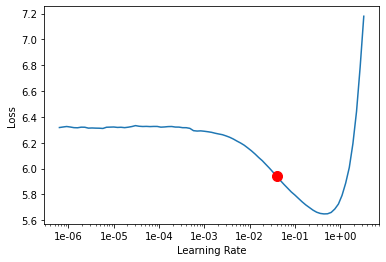

In [33]:
# finding the optimum learning rate
learn.lr_find()

# suggesting/capturing the optimum learning rate by plotting
learn.recorder.plot(suggestion=True)

# calculating the minimum gradient
min_grad_lr = learn.recorder.min_grad_lr

## Training the model with the Optimal Learning Rate:

__fit_one_cycle():__ Here we feed in the optimal learning rate to train our language model. First argument '2' is number of epoch runs.<br>
It trained last layers and basically left most of the model exactly as it was. But what we really want is to train the whole model. Normally after we fine-tune the last layers, the next thing we do is we go __unfreeze__ (unfreeze the whole model for training) and the again train the whole neural network.<br><br>

Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d

In [34]:
# training the last few layers of the model
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.659545,4.163816,0.240402,08:31
1,4.053174,4.037196,0.256194,08:33


In [35]:
# unfreezing the whole model
learn.unfreeze()

# training the rest of the neural network
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.585545,3.926399,0.272349,13:03
1,3.386041,3.923079,0.273577,12:58


Our language model only achieved around 30% accuracy. This accuracy represents how well the model does at predicting the next word, given one word.<br>

Accuracy = 0.3 means the model is guessing the next word of the movie review correctly about a third of the time. That sounds like a pretty high number. So it’s a good sign that our language model is doing pretty well.<br>

Hence, after fine-tuning we get a model that is good at understanding the reviews and we can fine-tune that with transfer learning to multi classify reviews. Finally, we save the language model encoder so that we can load it later in our classifier:

In [36]:
# saving the language model encoder
learn.save_encoder('ft_enc')

## Using the Language Model to train the Classifier:

__text_classifier_learner:__ built in fastai function used for training the text classifier. The first parameter is the __data_clas Databunch__. The second parameter is the __AWD_LSTM__ model architecture. For the third parameter drop_mult we have used 0.5. We have increased the dropout from 0.3 to 0.5 to prevent overfitting.

In [37]:
# training the text classifier using data_clas DataBunch we created earlier 
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

# loading the model language encoder which we have saved earlier
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (12961 items)
x: TextList
xxbos xxmaj xxunk 😃 💕 xxunk xxmaj that is why 
  i love xxup sw ✈ xxunk xxunk ) ❤,xxbos nope . xxmaj called , lost the seating xxunk i paid for , and here i still sit . xxmaj we 'll see what happens w / my flight xxmaj late xxmaj flightr .,xxbos xxmaj boston is all self service . xxmaj xxunk yr own boarding pass at gate . xxmaj most difficult : xxmaj tag your own bag . xxmaj not easy ! # xxunk,xxbos this is the biggest joke of # customerservice i 've ever seen from a ✈ ️ brand,xxbos thanks for three xxmaj cancelled xxmaj flightled flight and making us go from raleigh to xxunk to lexington to philly . xxunk of raleigh to philly
y: CategoryList
2,0,0,0,0
Path: .;

Valid: LabelList (1441 items)
x: TextList
xxbos is there gon na be a better day to call ? i 've called on 3 separate xxunk the past couple of weeks and never get to a person .,xxbos xxmaj that is appreciated . xxmaj however , the system tells you cal

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-01
Min loss divided by 10: 3.63E-02


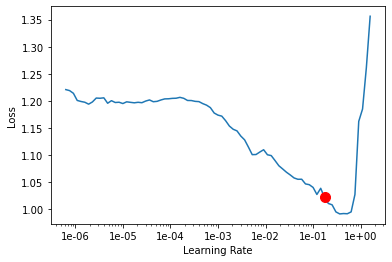

In [38]:
# again finding the optimal learning rate
learn.lr_find()

# ploting the optimal learning rate
learn.recorder.plot(suggestion=True)

# again calculating the minimum gradient
min_grad_lr = learn.recorder.min_grad_lr

In [39]:
# again training our language model by feeding in the optimal learning rate with 2 epochs
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.837566,0.630683,0.741152,05:52
1,0.716343,0.580475,0.764053,05:28


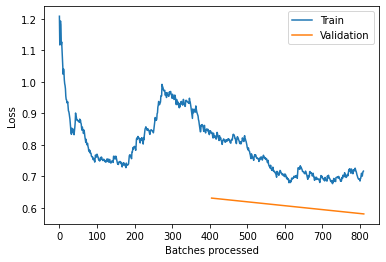

In [40]:
# tracking the loss functions over the epochs
learn.recorder.plot_losses()

__fit_one_cycle():__  It is one cycle of learning rate. When we call fit_one_cycle, we are actually passing in a maximum learning rate. On getting close to the final answer it is needed to anneal the learning rate to hone in on it. The motivation behind this is that during the middle of learning when learning rate is higher, the learning rate works as regularization method and keep network from over-fitting. This helps the network to avoid steep areas of loss and land better flatter minima.

Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d
<br><br><br>
__Discriminative Leraing Rates | slice():__ These are the techniques fast.ai uses underneath for such impressive results, applying different learning rate to layers as we go from layer to layer. When fitting a model you can pass a list of learning rates which will apply a different rate to each layer group. On passing slice(start,end) then the first group's learning rate is start, the last is end, and the remaining are evenly spaced.<br>
The bottom of the slice and the top of the slice is the difference between how quickly the lowest layer of the model learns versus the highest layer of the model learns. As you go from layer to layer, we decrease the learning rate. The lowest levels are given smaller learning rates so as not to disturb the weights much.

Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d
<br><br><br>
__Momentum:__ The argument(moms=(0.8,0.7)), momentums equals 0.8,0.7. Basically for training recurrent neural networks (RNNs), it really helps to decrease the momentum a little bit. Every time our learning rate is small, our momentum is high, as we are learning small learning rate, but we keep going in the same direction, we may as well go faster (higher momentum). But as we are learning at a high learning rate, but we keep going in the same direction, we might overshoot the target, so momentum should be slowed. This trick can help anyone train 10 times faster.
<br><br>
__freeze_to:__ Not unfreezing the whole thing but to unfreeze one layer at a time. Hence, unfreezing the last two layers __freeze_to(-2)__, training it a little bit more and then unfreeze the whole thing __unfreeze()__, train it a little bit more. This approach works very well and gives incredible results.

In [41]:
# gradual unfreezing
# start by training the last few layers, then go backwards and unfreeze and train layers before.
# here, we unfreeze the last 2 layers
learn.freeze_to(-2)

# training the language model
learn.fit_one_cycle(3, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.665255,0.542774,0.781402,06:53
1,0.591519,0.481252,0.813324,06:23
2,0.562565,0.468570,0.814712,06:24


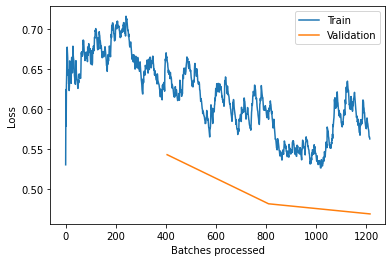

In [42]:
learn.recorder.plot_losses()

In [43]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.565793,0.443023,0.829979,16:44
1,0.505602,0.437789,0.836919,17:48
2,0.412855,0.428304,0.841083,18:04


# Analyzing the Results:

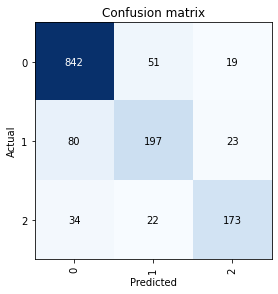

In [44]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [45]:
# finding the categories that the classifier gets confused on the most
interp.most_confused()

[(1, 0, 80), (0, 1, 51), (2, 0, 34), (1, 2, 23), (2, 1, 22), (0, 2, 19)]

### F1 Score: 
2 * (recall * precision) / (recall + precision)



In [46]:
f1_score(interp.pred_class, interp.y_true, average="macro")

0.7906687595969687

### Recall:

TP / (TP + FN)

In [47]:
recall_score(interp.pred_class, interp.y_true, average="macro")

0.8050113101652138

### Precision:

TN / (TN + FP)

In [48]:
precision_score(interp.pred_class, interp.y_true, average="macro")

0.778456931995199

### Accuracy:

In [49]:
accuracy_score(interp.pred_class, interp.y_true)

0.8410825815405968